# Implied Volatility and Volatility Models

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## Load the Libs we need

In [1]:
# import Lib
import pandas as pd            # Data manipulation and analysis
import datetime as dt          # Date and time manipulation
import pytz                    # Time zone calculations
import os                      # Operating system interfaces
import numpy as np             # Numerical operations and array manipulations
import matplotlib.pyplot as plt# Plotting and visualization
import scipy.stats as si       # Statistical functions
import math                    # Mathematical functions
import networkx as nx          # Creation, manipulation, and study of complex networks
import tensorflow as tf        # Machine learning and neural networks
import xgboost as xgb          # Gradient Boosting Machines for regression and classification

# import module
from datetime import datetime, timezone  # Date and time manipulation with timezone support
from datetime import date, time          # Date and time manipulation
from math import trunc                   # Truncate floating-point numbers
from dateutil.parser import parse        # Parsing dates from strings
from scipy.stats import norm             # Normal distribution functions
from scipy.optimize import minimize      # Optimization algorithms
from arch import arch_model              # Autoregressive Conditional Heteroskedasticity models
from sklearn.model_selection import train_test_split  # Splitting datasets into training and testing
from sklearn.preprocessing import StandardScaler      # Feature scaling and normalization
from tensorflow.keras.models import Sequential        # Neural network model
from tensorflow.keras.layers import Dense, Input      # Neural network layers
from sklearn.svm import SVR                           # Support Vector Regression model
from sklearn.ensemble import RandomForestRegressor    # Random Forest Regression model
from sklearn.metrics import mean_squared_error        # Metrics for evaluating model performance
from scipy.optimize import brentq                     # Root-finding algorithm
from mpl_toolkits.mplot3d import Axes3D               # 3D plotting
from scipy.interpolate import griddata                # Interpolation of scattered data

## Introduction to Implied Volatility

### The Volatility Smile

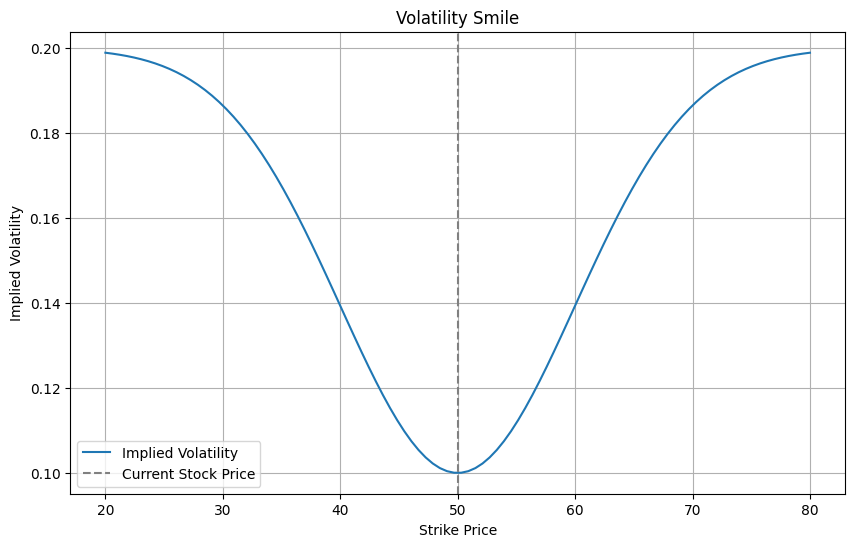

In [2]:
# Assuming an arbitrary pattern for the implied volatility based on the strike price
mb_current_stock_price = 50
mb_strike_prices = np.linspace(20, 80, 100)  # Range of strike prices from 20 to 80
mb_implied_volatilities = 0.2 - 0.1 * np.exp(-(mb_strike_prices - mb_current_stock_price)**2 / 200)  # Gaussian-like smile curve

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(mb_strike_prices, mb_implied_volatilities, label='Implied Volatility')
plt.title('Volatility Smile')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.axvline(mb_current_stock_price, color='grey', linestyle='--', label='Current Stock Price')
plt.legend()
plt.grid(True)

# Display the graph
plt.show()

## Overview of Volatility Models illustration

### Black-Scholes Model

In [3]:
# Define the parameters
S = 145  # Current stock price
K = 150  # Strike price
r = 0.02  # Risk-free interest rate
sigma = 0.20  # Volatility
T = 0.5  # Time to expiration in years

# Calculate d1 and d2
d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate call price
call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
print(f'The Black-Scholes price for the European call option is: ${call_price:.2f}')

The Black-Scholes price for the European call option is: $6.64


In [4]:
# Define the Black-Scholes call price function
def mb_bs_call_price(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Define the function to minimize (the difference between market price and model price)
def mb_implied_volatility_objective(sigma, S, K, r, T, market_price):
    return (mb_bs_call_price(S, K, r, sigma, T) - market_price) ** 2

# Market data and parameters
S = 145  # Current stock price
K = 150  # Strike price
r = 0.02  # Risk-free interest rate
T = 0.5  # Time to expiration in years
market_price = 6.64  # Market price of the call option

# Initial guess for volatility
initial_guess = 0.20

# Minimize the objective function to find the implied volatility
result = minimize(mb_implied_volatility_objective, initial_guess, args=(S, K, r, T, market_price), bounds=[(0.001, 3.0)])
implied_volatility = result.x[0]

print(f'The implied volatility for the European call option is: {implied_volatility:.4f}')

The implied volatility for the European call option is: 0.2001


### Generalized Autoregressive Conditional Heteroskedasticity (GARCH) Models

In [5]:
# Generate synthetic returns data (you can replace this with actual data)
np.random.seed(42)
returns = np.random.normal(0, 1, 1000)  # Replace with your actual returns data

# Fit a GARCH(1,1) model
model = arch_model(returns, vol='Garch', p=1, q=1)
model_fit = model.fit(disp="off")

# Print the model summary
print(model_fit.summary())

# Forecast future volatility
forecasts = model_fit.forecast(horizon=10)
forecast_volatility = np.sqrt(forecasts.variance.values[-1, :])
print(f'Forecasted volatility for the next 10 days: {forecast_volatility}')

# Black-Scholes call price function
def mb_bs_call_price(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Use the average forecasted volatility as input for Black-Scholes
avg_forecast_volatility = np.mean(forecast_volatility)
S = 145  # Current stock price
K = 150  # Strike price
r = 0.02  # Risk-free interest rate
T = 0.5  # Time to expiration in years

# Calculate the call option price using the forecasted volatility
call_price = mb_bs_call_price(S, K, r, avg_forecast_volatility, T)
print(f'The Black-Scholes price for the European call option using GARCH forecasted volatility is: ${call_price:.2f}')

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1397.17
Distribution:                  Normal   AIC:                           2802.33
Method:            Maximum Likelihood   BIC:                           2821.96
                                        No. Observations:                 1000
Date:                Tue, Jul 23 2024   Df Residuals:                      999
Time:                        21:25:47   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0181  3.107e-02      0.582      0.560 

## Introduction to the SABR Model

In [6]:
# SABR volatility function
def mb_sabr_vol(alpha, beta, rho, nu, F, K, T):
    if F == K:
        return alpha * (F ** (beta - 1))
    else:
        z = nu / alpha * (F * K) ** ((1 - beta) / 2) * np.log(F / K)
        x_z = np.log((np.sqrt(1 - 2 * rho * z + z ** 2) + z - rho) / (1 - rho))
        return alpha * (F * K) ** ((beta - 1) / 2) * (1 + (beta ** 2 / 24 * np.log(F / K) ** 2 + 1 / 4 * (rho * beta * nu / alpha) * np.log(F / K) + (2 - 3 * rho ** 2) / 24 * nu ** 2 / alpha ** 2) * T) * z / x_z

# Market data for calibration
market_strikes = np.array([90, 100, 110])
market_vols = np.array([0.25, 0.2, 0.22])
F = 100  # Forward price
T = 1    # Time to maturity

# Objective function for calibration
def mb_objective(params):
    alpha, beta, rho, nu = params
    model_vols = [mb_sabr_vol(alpha, beta, rho, nu, F, K, T) for K in market_strikes]
    return np.sum((model_vols - market_vols) ** 2)

# Initial guess
initial_guess = [0.2, 0.5, 0.0, 0.3]

# Calibrate SABR parameters
result = minimize(mb_objective, initial_guess, bounds=[(0, None), (0, 1), (-1, 1), (0, None)])
alpha, beta, rho, nu = result.x

# Output calibrated parameters
print(f"Calibrated parameters: alpha={alpha:.4f}, beta={beta:.4f}, rho={rho:.4f}, nu={nu:.4f}")

# Example usage of calibrated parameters to compute implied volatilities for different strikes
example_strikes = np.array([95, 100, 105])
implied_vols = [mb_sabr_vol(alpha, beta, rho, nu, F, K, T) for K in example_strikes]
print(f"Implied volatilities for strikes {example_strikes}: {implied_vols}")

# Use the calibrated parameters for option pricing (using Black-Scholes as an example)
from scipy.stats import norm

def mb_black_scholes_call_price(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Pricing an option with strike price 100 using the implied volatility from SABR model
K = 100
r = 0.02  # Risk-free rate
sigma = mb_sabr_vol(alpha, beta, rho, nu, F, K, T)
call_price = mb_black_scholes_call_price(F, K, r, sigma, T)
print(f"Option price for strike {K} using SABR implied volatility: ${call_price:.2f}")

Calibrated parameters: alpha=0.4008, beta=0.8491, rho=-0.4381, nu=0.6531
Implied volatilities for strikes [ 95 100 105]: [0.23999395012670002, 0.19999997718927237, 0.22479003173480622]
Option price for strike 100 using SABR implied volatility: $8.92


## Machine learning Models

### Neural Networks

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


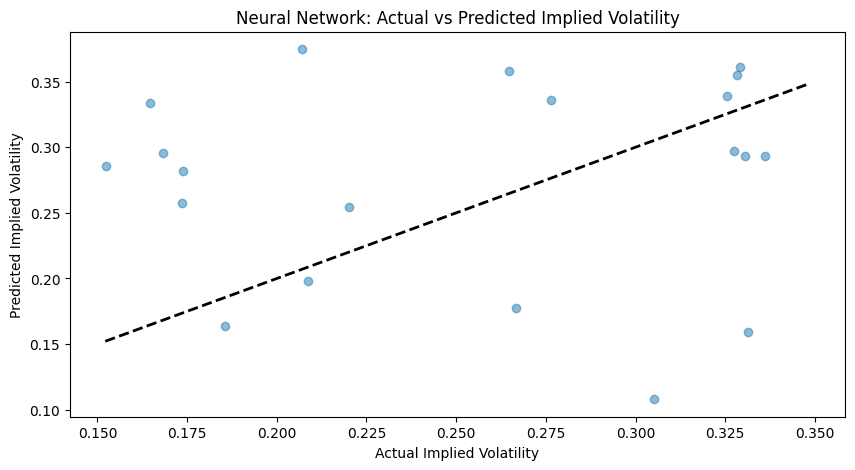

Mean Squared Error (NN): 0.010306564052047516


In [7]:
# Assuming you have your data prepared
# Load and preprocess data
data = pd.read_csv('option_data.csv')  # Replace with your data source
X = data[['strike', 'time_to_maturity', 'underlying_price', 'interest_rate']].values
y = data['implied_volatility'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define the input shape in the Input layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Predict implied volatilities
y_pred_nn = model.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_nn, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Implied Volatility')
plt.ylabel('Predicted Implied Volatility')
plt.title('Neural Network: Actual vs Predicted Implied Volatility')
plt.show()

# Calculate the mean squared error
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f'Mean Squared Error (NN): {mse_nn}')

### Support Vector Regression (SVR)

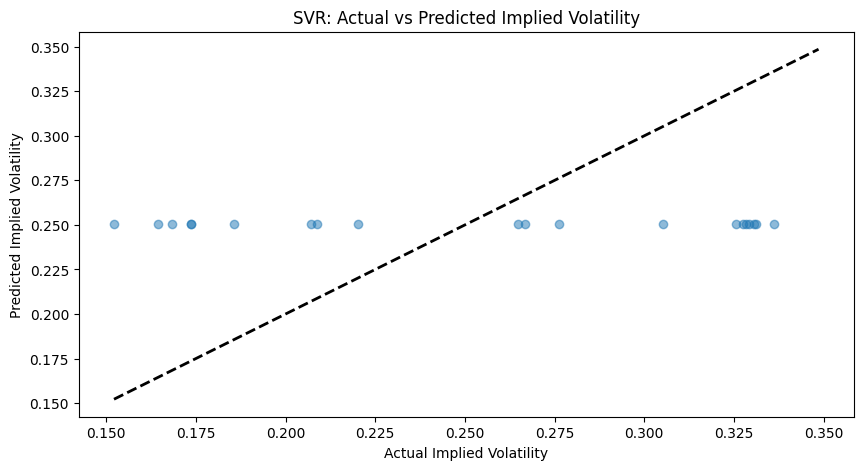

Mean Squared Error (SVR): 0.004629373394452118


In [8]:
# Load and preprocess data
data = pd.read_csv('option_data.csv')  # Replace with your data source
X = data[['strike', 'time_to_maturity', 'underlying_price', 'interest_rate']].values
y = data['implied_volatility'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# Predict implied volatilities
y_pred_svr = svr.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Implied Volatility')
plt.ylabel('Predicted Implied Volatility')
plt.title('SVR: Actual vs Predicted Implied Volatility')
plt.show()

# Calculate the mean squared error
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'Mean Squared Error (SVR): {mse_svr}')

### Gradient Boosting Machines (GBM)

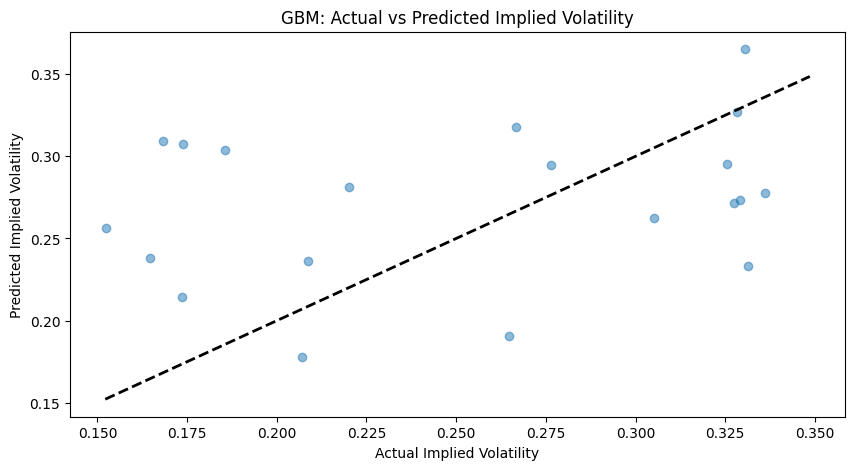

Mean Squared Error: 0.005333748678492742


In [9]:
# Load and preprocess data
data = pd.read_csv('option_data.csv')  # Replace with your data source
X = data[['strike', 'time_to_maturity', 'underlying_price', 'interest_rate']].values
y = data['implied_volatility'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the GBM model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

# Predict implied volatilities
y_pred_gbm = model.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_gbm, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Implied Volatility')
plt.ylabel('Predicted Implied Volatility')
plt.title('GBM: Actual vs Predicted Implied Volatility')
plt.show()

# Print the mean squared error
mse = mean_squared_error(y_test, y_pred_gbm)
print(f'Mean Squared Error: {mse}')

### Random Forest Regression

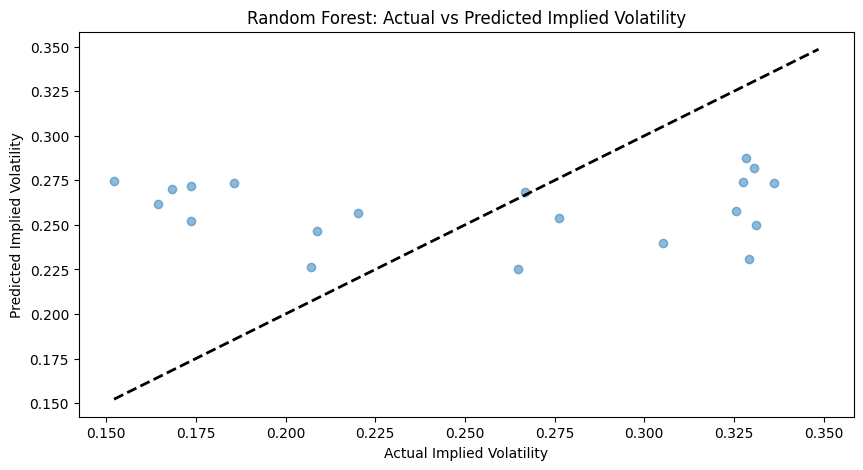

Mean Squared Error: 0.004971158647606324


In [10]:
# Load and preprocess data
data = pd.read_csv('option_data.csv')  # Replace with your data source
X = data[['strike', 'time_to_maturity', 'underlying_price', 'interest_rate']].values
y = data['implied_volatility'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict implied volatilities
y_pred_rf = model.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Implied Volatility')
plt.ylabel('Predicted Implied Volatility')
plt.title('Random Forest: Actual vs Predicted Implied Volatility')
plt.show()

# Print the mean squared error
mse = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse}')

## Calculating Implied Volatility Using Python

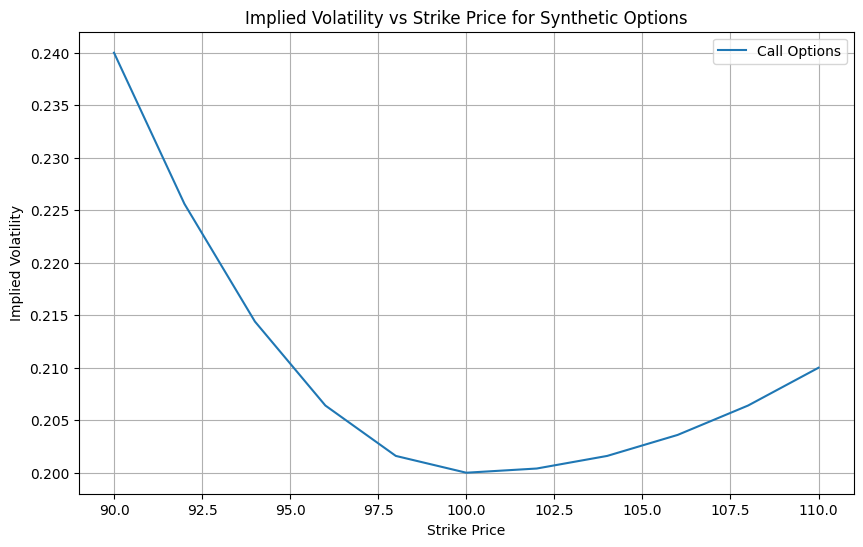

In [11]:
# Define the Black-Scholes price calculation
def mb_black_scholes_price(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        price = (S * norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * norm.cdf(d2, 0.0, 1.0))
    elif option_type == 'put':
        price = (K * np.exp(-r * T) * norm.cdf(-d2, 0.0, 1.0) - S * norm.cdf(-d1, 0.0, 1.0))
    return price

# Constants for Black-Scholes price calculation
spot_price = 100  # current price of the underlying asset
T = 30 / 365  # time to expiry in years
risk_free_rate = 0.01  # risk-free interest rate

# Range of strike prices
strike_prices = np.linspace(90, 110, 11)  # 11 points between 90 and 110

# A skewed implied volatility function that is convex and asymmetric
def mb_skewed_volatility(K):
    if K < spot_price:
        return 0.2 + ((spot_price - K) / 50) ** 2
    else:
        return 0.2 + ((K - spot_price) / 100) ** 2

# Synthetic market prices
market_prices = [mb_black_scholes_price(spot_price, K, T, risk_free_rate, mb_skewed_volatility(K), 'call') for K in strike_prices]

# Dataframe for our synthetic options
options_df = pd.DataFrame({'strike': strike_prices, 'market_price': market_prices})

# Define the implied volatility calculation
def mb_implied_volatility(market_price, S, K, T, r, option_type='call'):
    def mb_price_diff(sigma):
        return mb_black_scholes_price(S, K, T, r, sigma, option_type) - market_price
    iv = brentq(mb_price_diff, 1e-6, 2)
    return iv

# Calculate implied volatility for each strike price
options_df['ImpliedVolatility'] = options_df.apply(lambda row: mb_implied_volatility(row['market_price'], spot_price, row['strike'], T, risk_free_rate, 'call'), axis=1)

# Plot implied volatility
plt.figure(figsize=(10, 6))
plt.plot(options_df['strike'], options_df['ImpliedVolatility'], label='Call Options')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility vs Strike Price for Synthetic Options')
plt.legend()
plt.grid(True)
plt.show()

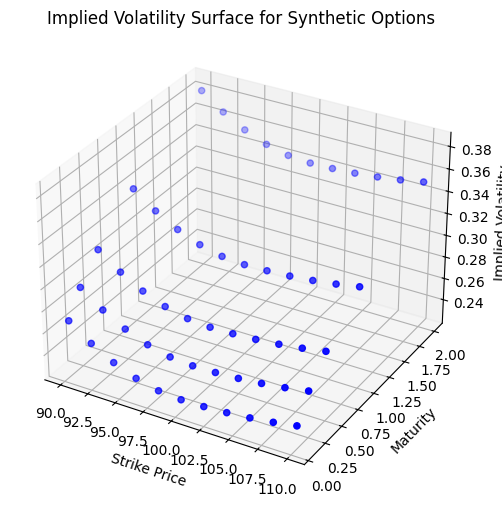

In [12]:
# Constants for Black-Scholes price calculation
spot_price = 100  # current price of the underlying asset
risk_free_rate = 0.01  # risk-free interest rate

# Range of strike prices and maturities
strike_prices = np.linspace(90, 110, 11)  # 11 points between 90 and 110
maturities = np.array([1/12, 3/12, 6/12, 12/12, 24/12])  # in years

# A skewed implied volatility function that is convex and asymmetric and increases with time
def mb_skewed_volatility(K, T):
    base_vol = 0.2 + 0.1 * (T ** 0.5)
    if K < spot_price:
        return base_vol + ((spot_price - K) / 50) ** 2
    else:
        return base_vol + ((K - spot_price) / 100) ** 2

# Synthetic market prices for different maturities
options_df = pd.DataFrame([(K, T, mb_black_scholes_price(spot_price, K, T, risk_free_rate, mb_skewed_volatility(K, T), 'call')) 
                           for K in strike_prices for T in maturities], 
                          columns=['strike', 'maturity', 'market_price'])

# Calculate implied volatility for each strike price and maturity
options_df['ImpliedVolatility'] = options_df.apply(lambda row: mb_implied_volatility(row['market_price'], spot_price, row['strike'], row['maturity'], risk_free_rate, 'call'), axis=1)

# 3D Plot implied volatility
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(options_df['strike'], options_df['maturity'], options_df['ImpliedVolatility'], c='b', marker='o')
ax.set_xlabel('Strike Price')
ax.set_ylabel('Maturity')
ax.set_zlabel('Implied Volatility')
plt.title('Implied Volatility Surface for Synthetic Options')
plt.show()


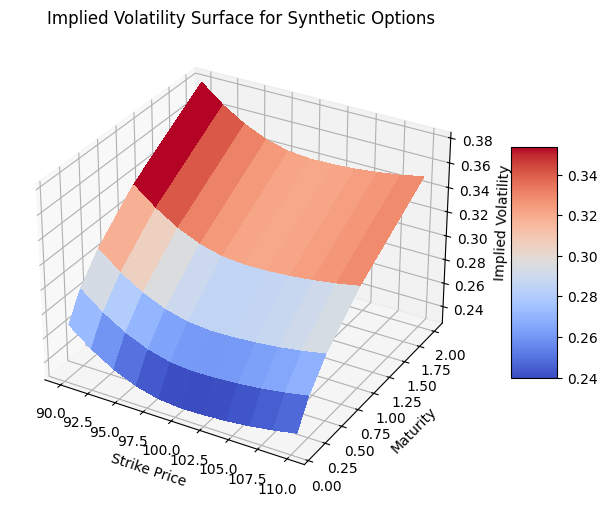

In [13]:
# Constants for Black-Scholes price calculation
spot_price = 100  # current price of the underlying asset
risk_free_rate = 0.01  # risk-free interest rate

# Range of strike prices and maturities
strike_prices = np.linspace(90, 110, 11)  # 11 points between 90 and 110
maturities = np.array([1/12, 3/12, 6/12, 12/12, 24/12])  # in years

# A skewed implied volatility function that is convex and asymmetric and increases with time
def mb_skewed_volatility(K, T):
    base_vol = 0.2 + 0.1 * (T ** 0.5)
    if K < spot_price:
        return base_vol + ((spot_price - K) / 50) ** 2
    else:
        return base_vol + ((K - spot_price) / 100) ** 2

# Synthetic market prices for different maturities
options_df = pd.DataFrame([(K, T, mb_black_scholes_price(spot_price, K, T, risk_free_rate, mb_skewed_volatility(K, T), 'call')) 
                           for K in strike_prices for T in maturities], 
                          columns=['strike', 'maturity', 'market_price'])

# Calculate implied volatility for each strike price and maturity
options_df['ImpliedVolatility'] = options_df.apply(lambda row: mb_implied_volatility(row['market_price'], spot_price, row['strike'], row['maturity'], risk_free_rate, 'call'), axis=1)

# Create a grid of strike prices and maturities
K, T = np.meshgrid(strike_prices, maturities)

# Interpolate implied volatility onto grid
IV = griddata((options_df['strike'], options_df['maturity']), options_df['ImpliedVolatility'], (K, T), method='cubic')

# 3D Plot implied volatility
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(K, T, IV, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('Strike Price')
ax.set_ylabel('Maturity')
ax.set_zlabel('Implied Volatility')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Implied Volatility Surface for Synthetic Options')
plt.show()
